In [1]:
# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt install texlive-latex-extra
# ! sudo apt install dvipng
# ! apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns
import matplotlib
from math import sqrt

Plots

In [ ]:
OE = pd.read_pickle('/content/drive/My Drive/CSCW_H1/results/'+'OE_0_5_bert-base-cased_32_0.3_cuda_3_10_5e-05_deduplicated-extra')
ST = pd.read_pickle('/content/drive/My Drive/CSCW_H1/results/'+'ST_0_5_bert-base-cased_32_0.3_cuda_3_10_5e-05_deduplicated')

In [ ]:
gt = []
pred = []
for i in range(5):
  pred.extend(OE['test_outs'][i]['pred_y'])
  gt.extend(OE['test_outs'][i]['y'])
gtst = []
predst = []
for i in range(5):
  predst.extend(ST['test_outs'][i]['pred_y'])
  gtst.extend(ST['test_outs'][i]['y'])

In [ ]:
gt = [i-1 for i in gt]
pred = [i-1 for i in pred]
gtst = [i-1 for i in gtst]
predst = [i-1 for i in predst]

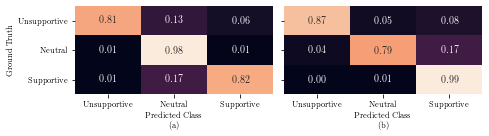

In [ ]:
#sns.set_context('poster')
latexify(columns=2, fig_height=2)
fig, ax = plt.subplots(1,2, sharey=True, sharex=True)
# plt.subplots_adjust(wspace=0)
#my_cmap = [my_clr['y'], my_clr['l_r']]
#my_cmap = plt.cm.plasma_r
OE_CM = confusion_matrix(gt, pred)/confusion_matrix(gt, pred).sum(axis=1)[:, np.newaxis]
ST_CM = confusion_matrix(gtst, predst)/confusion_matrix(gtst, predst).sum(axis=1)[:, np.newaxis]

OE_CM_annot = [["%.2f"%i for i in j] for j in OE_CM]
ST_CM_annot = [["%.2f"%i for i in j] for j in ST_CM]

sns.heatmap(OE_CM, 
            annot=OE_CM_annot,xticklabels=['Unsupportive','Neutral','Supportive'],
            yticklabels=['Unsupportive','Neutral','Supportive'], cbar=False,ax=ax[0],fmt='');
sns.heatmap(ST_CM, 
            annot=ST_CM_annot, xticklabels=['Unsupportive','Neutral','Supportive'], 
            yticklabels=['Unsupportive','Neutral','Supportive'], cbar=False, fmt='',ax=ax[1]);
ax[0].set_xlabel('Predicted Class\n(a)');
ax[1].set_xlabel('Predicted Class\n(b)');
ax[0].set_ylabel('Ground Truth');
plt.tight_layout()
plt.savefig('confusionMat.pdf')